## Bitly usa.gov Data Analysis

The URL shortening service **Bitly** partnered with the US government website usa.gov to provide a feed of anonymous data gathered from users who shorten links ending with *.gov* or *.mil*. (McKinney, 2022)

In [27]:
import json
import collections
import pandas as pd
import seaborn as sns

### Loading the dataset

In [30]:
path = './example.txt'

with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [19]:
# Using JSON package:
with open(path) as f:
    records = [json.loads(line) for line in f]

for ind in records[0]:
    print(f'{ind}: {records[0][ind]}')

a: Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11
c: US
nk: 1
tz: America/New_York
gr: MA
g: A6qOVH
h: wfLQtf
l: orofrog
al: en-US,en;q=0.8
hh: 1.usa.gov
r: http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf
u: http://www.ncbi.nlm.nih.gov/pubmed/22415991
t: 1331923247
hc: 1331822918
cy: Danvers
ll: [42.576698, -70.954903]


In [ ]:
# Loading the pandas DataFrame
df = pd.DataFrame(records)

df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


### Understanding the big picture

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [ ]:
df.shape

(3560, 18)

In [26]:
na_counts = df.isna().sum()

na_counts

a               120
c               641
nk              120
tz              120
gr              641
g               120
h               120
l               120
al              466
hh              120
r               120
u               120
t               120
hc              120
cy              641
ll              641
_heartbeat_    3440
kw             3467
dtype: int64

### Understanding the variables

#### Analysing time zones `'tz'`

In [9]:
# Getting and showing the time zones
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [34]:
# Getting time zone counts using collections
counts = collections.Counter(time_zones)

print(counts.most_common(10))

[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191), ('Europe/London', 74), ('Asia/Tokyo', 37), ('Pacific/Honolulu', 36), ('Europe/Madrid', 35), ('America/Sao_Paulo', 33)]


In [44]:
# Using pandas
tz_counts = df['tz'].value_counts()

tz_counts.head(10)

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

In [47]:
# Clean NaNs and "" data
tz_clean = df['tz'].fillna('Missing')

tz_clean[tz_clean == ""] = "Unknown"

In [48]:
# Count time zones
tz_counts = tz_clean.value_counts()

tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

<Axes: ylabel='tz'>

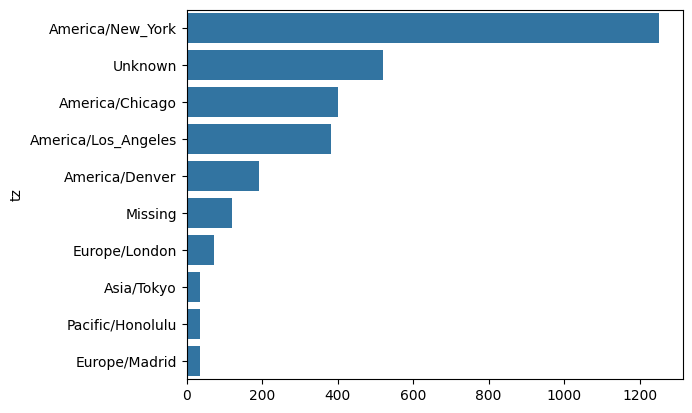

In [53]:
# Plot using Seaborn
subset = tz_counts.head(10)

sns.barplot(y=subset.index, x=subset.to_numpy())

### References

McKinney, W. (2022). Python for Data Analysis. Data wrangling with pandas, NumPy & Jupyter. O'Reilly, 3rd ed: Sebastopol, USA.